In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint, solve_ivp

In [21]:
class AllenCahn:
    """
    An implementation of the Allen-Cahn equation in two dimensions, using the method
    of lines and explicit finite differences

    Parameters
        nx (int): number of grid points in the x direction
        ny (int): number of grid points in the y direction
        kappa (float): reaction rate
        d (float): diffusion coefficient
        Lx (float): length of the domain in the x direction
        Ly (float): length of the domain in the y direction

    """

    def __init__(self, nx, ny, kappa=1.0, d=1.0, Lx=1.0, Ly=1.0):
        self.nx = nx
        self.ny = ny
        self.dx = Lx / nx
        self.dy = Ly / ny
        self.d = d
        self.kappa = kappa
       
    def _laplace(self, grid):
        """
        Apply the two-dimensional Laplace operator to a square array
        """
        
        # enforce reflection boundary conditions by padding rows and columns
        grid = np.vstack([grid[0, :][None, :], grid, grid[-1, :][None, :]])   # stack the first row on top of grid and last row on the bottom
        grid  = np.hstack([grid[:, 0][:, None], grid, grid[:, -1][:, None]])  # add the first column to left of grid and last column to right
        
        lap = np.zeros((self.ny, self.nx))   # grid of zeros to turn into laplace result
        # laplace only for inner region of grid [1:-1][1:-1]... i.e. leave boundary at zero (Nuemann)
        lap = grid[:-2, 1:-1] + grid[1:-1, :-2] + grid[2:, 1:-1] + grid[1:-1, 2:]   # apply descrete Laplace defn for non i,j components
        lap -= 4 * grid[1:-1, 1:-1]   # apply descrete Laplace defn for i,j components
        lap /= self.dx * self.dy   # divide by dx and dy
        
        return lap   # return grid of derivatives
        
    def _reaction(self, y):
        """
        Bistable reaction term
        """
        return y * (1 - y**2)   # bistable term from governing equation

    def rhs(self, t, y):
        """
        For technical reasons, this function needs to take a one-dimensional vector, 
        and so we have to reshape the vector back into the mesh
        """
        y = y.reshape((self.ny, self.nx))   # first reshape vector to 2D grid-size
        y_dot = self.d * self._laplace(y) + self.kappa * self._reaction(y)   # preform operation of governing diff eq
        return y_dot.flatten()   # reshape back into vector for return


    def solve(self, y0, t_min, t_max, nt, **kwargs):
        """
        Solve the heat equation using the odeint solver

        **kwargs are passed to scipy.integrate.solve_ivp
        """
        time = np.linspace(t_min, t_max, nt)   # generate vector of times from t_min to t_max filled with nt points
        solve = solve_ivp(self.rhs, (t_min, t_max), y0.flatten(), t_eval=time, **kwargs)
        # solve right-hand-side from t_min to t_max with the initial state y0 (as a vector cause flatten())
        # store the solution at the time points time
        tpts =  solve.t # store the time points as tpts
        sol = solve.y   # store the values of solution
        sol = sol.T     # transpose sol
        sol = sol.reshape((len(tpts), self.ny, self.nx))   # reshape solution to grid changing through time
        return tpts, sol   # return time points and solution through time
    

RK23


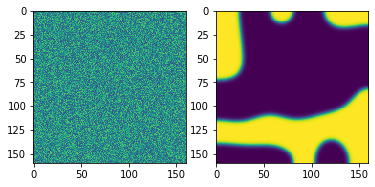

RK45


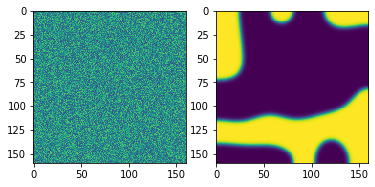

Radau


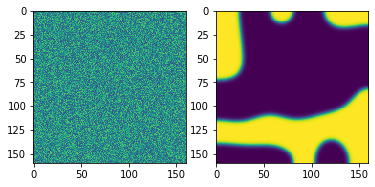

BDF


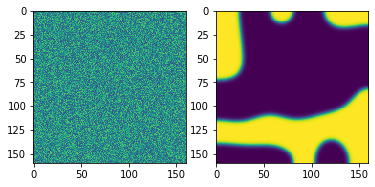

LSODA


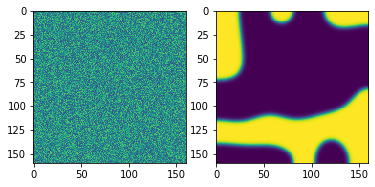

In [22]:
## Run an example simulation and plot the before and after
np.random.seed(0)
ic = np.random.random((160, 160)) - 0.5
model = AllenCahn(ic.shape[0],ic.shape[1], kappa=1e1, d=1e-3)

mm = ['RK23','RK45','Radau','BDF','LSODA']

for m in mm:
    print(m)
    tpts, sol = model.solve(y0=ic, t_min=0, t_max=8, nt=400, model = str(m))

    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.imshow(sol[0], vmin=-1, vmax=1)
    plt.subplot(1, 2, 2) # index 2
    plt.imshow(sol[-1], vmin=-1, vmax=1)
    plt.show()

In [20]:
a = np.random.random((3, 3))*500
a = a.astype(int)
print(a)
print()
b = np.vstack([a[0, :][None, :], a, a[-1, :][None, :]])
print(b)
print()
c = np.hstack([b[:, 0][:, None], b, b[:, -1][:, None]])
print(c)

[[457 154  23]
 [449 199 313]
 [165 244 385]]

[[457 154  23]
 [457 154  23]
 [449 199 313]
 [165 244 385]
 [165 244 385]]

[[457 457 154  23  23]
 [457 457 154  23  23]
 [449 449 199 313 313]
 [165 165 244 385 385]
 [165 165 244 385 385]]


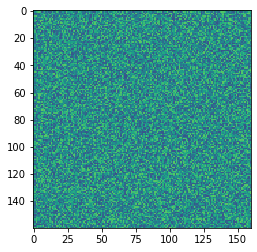

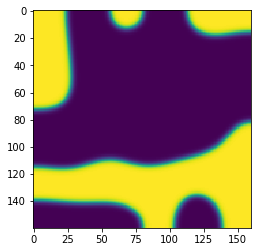

In [78]:
tpts, sol = model.solve(y0=ic, t_min=0, t_max=8, nt=400, method="RK45")

plt.figure()
plt.imshow(sol[0], vmin=-1, vmax=1)

plt.figure()
plt.imshow(sol[-1], vmin=-1, vmax=1)

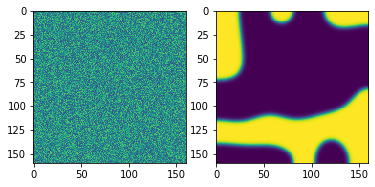

In [83]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.imshow(sol[0], vmin=-1, vmax=1)
plt.subplot(1, 2, 2) # index 2
plt.imshow(sol[-1], vmin=-1, vmax=1)
plt.show()